In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import xlrd

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="Transactions",skiprows=1)

In [ ]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [ ]:
len(df.product_id.unique())

101

Total number of products

In [ ]:
df[df.order_status=='Approved']['standard_cost'].sum()

10703760.7750281

In [ ]:
pd.pivot_table(df,index=['brand','product_line','product_class','product_size'],columns=['list_price','standard_cost'],aggfunc=[np.sum])

sum  ...               
                                                       customer_id  ... transaction_id
list_price                                                 12.01    ...        2091.47
standard_cost                                               7.21    ...         388.92
brand          product_line product_class product_size              ...               
Giant Bicycles Road         low           small                NaN  ...            NaN
                            medium        medium               NaN  ...            NaN
               Standard     high          medium               NaN  ...            NaN
                                          small                NaN  ...            NaN
                            medium        large                NaN  ...            NaN
                                          medium               NaN  ...            NaN
                                          small                NaN  ...            NaN
               Touring      medium        large                NaN  ...            NaN
Norco Bicycles Mountain     low           small                NaN  ...            NaN
               Road         high          large                NaN  ...            NaN
                            medium        large                NaN  ...            NaN
                                          medium               NaN  ...            NaN
               Standard     high          medium               NaN  ...            NaN
                                          small                NaN  ...            NaN
                            low           medium               NaN  ...            NaN
                            medium        medium               NaN  ...            NaN
                                          small                NaN  ...            NaN
OHM Cycles     Road         high          large           334614.0  ...            NaN
                            medium        medium               NaN  ...            NaN
                                          small                NaN  ...            NaN
               Standard     high          medium               NaN  ...            NaN
                            low           medium               NaN  ...            NaN
                            medium        medium               NaN  ...            NaN
               Touring      low           medium               NaN  ...            NaN
Solex          Road         medium        large                NaN  ...            NaN
                                          medium               NaN  ...            NaN
                                          small                NaN  ...            NaN
               Standard     high          large                NaN  ...            NaN
                                          medium               NaN  ...            NaN
                            low           medium               NaN  ...            NaN
                            medium        large                NaN  ...            NaN
                                          medium               NaN  ...            NaN
               Touring      medium        large                NaN  ...            NaN
Trek Bicycles  Mountain     low           medium               NaN  ...            NaN
               Road         low           medium               NaN  ...            NaN
                                          small                NaN  ...            NaN
                            medium        large                NaN  ...            NaN
                                          medium               NaN  ...            NaN
               Standard     high          medium               NaN  ...            NaN
                            low           medium               NaN  ...            NaN
                            medium        large                NaN  ...      4481462.0
                                          medium             

In [ ]:
pd.pivot_table(df,index=['brand','product_line'],values=['list_price','standard_cost'],aggfunc=[np.sum]) 

sum              
                             list_price standard_cost
brand          product_line                          
Giant Bicycles Road           543611.87  3.667721e+05
               Standard      3133783.82  1.947222e+06
               Touring        329818.72  1.520552e+05
Norco Bicycles Mountain       134971.48  1.201245e+05
               Road           744054.00  4.369634e+05
               Standard      1734938.84  1.203625e+06
OHM Cycles     Road           739928.65  6.002060e+05
               Standard      1952569.87  6.701962e+05
               Touring        242513.82  2.110478e+05
Solex          Road           694948.04  4.726285e+05
               Standard      3286809.66  1.435081e+06
               Touring        416788.00  1.350060e+05
Trek Bicycles  Mountain       127570.08  1.020556e+05
               Road          1064225.30  5.552179e+05
               Standard      2282973.63  1.010174e+06
WeareA2B       Road           179435.34  1.596968e+05
               Standard      2949647.99  1.086016e+06
               Touring        973582.61  1.392670e+05

The **standard** *product line* in all brands have generated the high revenue compared to other lines


In [ ]:
df.brand.value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

**Solex** brand is most purchased and second highest purchases are from **WeareA2B**.
The least purchases are from **Norco** Bicycles and Trek bicycles are not too far from last.

In [ ]:
pd.pivot_table(df,values=[],index=['brand','product_size'],aggfunc=lambda x:x.count())

brand  product_size
brand          product_size                     
Giant Bicycles large           924           924
               medium         1745          1745
               small           575           575
Norco Bicycles large           405           405
               medium         1708          1708
               small           750           750
OHM Cycles     large           193           193
               medium         2604          2604
               small           196           196
Solex          large          1067          1067
               medium         2921          2921
               small           181           181
Trek Bicycles  large           888           888
               medium         1508          1508
               small           535           535
WeareA2B       large           423           423
               medium         2281          2281
               small           541           541

The product size which is in high demand is ***Medium***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [ ]:
df.transaction_date.value_counts()

2017-02-14    81
2017-08-18    81
2017-10-15    73
2017-01-31    72
2017-12-19    70
              ..
2017-12-07    37
2017-01-12    36
2017-09-25    35
2017-03-29    34
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64

Highest transactions were done on **2017-02-14** on the occasion of ***valentines day*** and on **2017-08-18**

In [ ]:
df['month']=df['transaction_date'].dt.month

In [ ]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,8
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,10


In [ ]:
k=pd.pivot_table(df,index=['brand','month'],values=[],aggfunc=lambda x:x.count())

In [ ]:
k.head(12)

brand  month
brand          month              
Giant Bicycles 1        275    275
               2        260    260
               3        235    235
               4        258    258
               5        297    297
               6        255    255
               7        273    273
               8        292    292
               9        242    242
               10       276    276
               11       283    283
               12       298    298

Giant Bicycles has highest sales in the months of May, August, December.
This pattern is observed to be as high sales occur in end of seasons.



*   (August - Winter end)
*   (December - Spring end)
*   (May - autumn end)





In [ ]:
k.iloc[12:24]

brand  month
brand          month              
Norco Bicycles 1        241    241
               2        234    234
               3        250    250
               4        259    259
               5        238    238
               6        223    223
               7        230    230
               8        230    230
               9        211    211
               10       263    263
               11       225    225
               12       259    259

**Norco Bicycles** has highest sales in months **April, October, December**.

In [ ]:
k.iloc[24:36]

brand  month
brand      month              
OHM Cycles 1        258    258
           2        221    221
           3        261    261
           4        249    249
           5        226    226
           6        249    249
           7        280    280
           8        275    275
           9        231    231
           10       250    250
           11       256    256
           12       237    237

**OHM Cycles** has highest sales in the month **JULY** and **AUGUST**

In [ ]:
#k.iloc[36:48]

Solex have highest sales in october and november.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [ ]:
df['day']=df['transaction_date'].dt.day

In [ ]:
dayy=pd.pivot_table(df,index=['brand','day'],values=[],aggfunc=[lambda s:s.count()])

In [ ]:
dictt={1:'first',2:'first',3:'first',4:'first',5:'first'
,6:'first',7:'first',8:'first',9:'first',10:'first',
11:'second',12:'second',13:'second',14:'second',15:'second',16:'second',17:'second',18:'second',19:'second',20:'second',
21:'third',22:'third',23:'third',24:'third',25:'third',26:'third',27:'third',28:'third',29:'third',30:'third',31:'third'
}

df['another']=df['day'].map(dictt)


In [ ]:

pd.pivot_table(df,index=['brand','another'],values=[],aggfunc=lambda x:x.count())

another  brand
brand          another                
Giant Bicycles first       1065   1065
               second      1101   1101
               third       1078   1078
Norco Bicycles first        938    938
               second       969    969
               third        956    956
OHM Cycles     first        985    985
               second      1047   1047
               third        961    961
Solex          first       1336   1336
               second      1428   1428
               third       1405   1405
Trek Bicycles  first       1000   1000
               second       998    998
               third        933    933
WeareA2B       first       1073   1073
               second      1070   1070
               third       1102   1102

Most purchases are being happened in mid 10 days of the month

In [ ]:
df['day'][df['online_order']==1].value_counts()

15    363
8     352
18    352
16    341
1     340
20    339
4     335
14    335
6     334
22    330
13    329
27    329
9     328
2     328
21    322
10    322
5     318
28    314
19    312
24    311
25    307
3     307
17    305
11    304
26    300
12    293
7     293
23    283
30    277
29    270
31    166
Name: day, dtype: int64

less number of online orders are recorded on 31st of every month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [ ]:
pd.pivot_table(df,index=['brand','product_size'],values=['list_price','standard_cost'],aggfunc=[np.mean])

mean              
                              list_price standard_cost
brand          product_size                           
Giant Bicycles large         1548.465130    735.970076
               medium        1051.554332    645.332309
               small         1289.513600   1147.665965
Norco Bicycles large         1024.096074    641.738420
               medium         836.067916    476.838560
               small         1028.268547    915.157840
OHM Cycles     large           12.010000      7.210000
               medium         989.990173    447.128299
               small         1810.000000   1610.900000
Solex          large         1413.016701    671.921190
               medium         884.121794    359.930125
               small         1703.520000   1516.130000
Trek Bicycles  large         1898.328570    489.548908
               medium         610.147613    304.617129
               small         1624.206804   1445.543645
WeareA2B       large         1649.755957    167.792009
               medium        1273.282784    382.781548
               small          925.066802    814.934436

In [ ]:
df[['list_price','standard_cost']][(df['product_size']=='large') & (df['brand']=='OHM Cycles')]
#The list_price and standard_cost inappropriate

,list_price,standard_cost
60,12.01,7.21
88,12.01,7.21
195,12.01,7.21
722,12.01,7.21
810,12.01,7.21
...,...,...
19291,12.01,7.21
19485,12.01,7.21
19599,12.01,7.21
19933,12.01,7.21


In [ ]:
 df['online_order'].value_counts()

1.0    9739
0.0    9706
Name: online_order, dtype: int64

The online orders are more than offline orders

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [ ]:
a=pd.pivot_table(df,index=['brand'],values=['list_price'],aggfunc=[sum])

In [ ]:
a

,sum
,list_price
brand,
Giant Bicycles,4007214.41
Norco Bicycles,2613964.32
OHM Cycles,2935012.34
Solex,4398545.70
Trek Bicycles,3474769.01
WeareA2B,4102665.94


In [ ]:
a.index

Index(['Giant Bicycles', 'Norco Bicycles', 'OHM Cycles', 'Solex',
       'Trek Bicycles', 'WeareA2B'],
      dtype='object', name='brand')

In [ ]:
kk=[]
for i in range(len(a)):
  kk.append(a[('sum','list_price')][i])
kk    

[4007214.4099999787,
 2613964.319999966,
 2935012.3399999477,
 4398545.700000078,
 3474769.010000025,
 4102665.939999992]

No handles with labels found to put in legend.


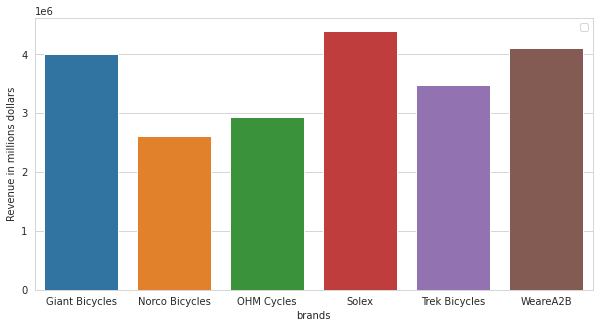

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.gcf()
fig.set_size_inches(10,5)
sns.set_style('whitegrid')
sns.barplot(a.index,kk)
plt.ylabel('Revenue in millions dollars')
plt.xlabel('brands')

plt.legend()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [ ]:
dm=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',skiprows=1)

In [ ]:
dm.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
dm.drop('last_name',inplace=True,axis=1)

In [ ]:
dm.drop('default',inplace=True,axis=1)

In [ ]:
dm.job_industry_category.value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [ ]:
dm.drop('job_title',inplace=True,axis=1)

In [ ]:
dm['DOB_Age']=dm['DOB'].dt.year
dm['Age']=2020-dm['DOB_Age']
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   job_industry_category                3344 non-null   object        
 6   wealth_segment                       4000 non-null   object        
 7   deceased_indicator                   4000 non-null   object        
 8   owns_car                             4000 non-null   object        
 9   tenure                               3913 non-null   float64       
 10  DOB_Age     

In [ ]:
dm.drop(['DOB','DOB_Age'],inplace=True,axis=1)
dm['Age'].fillna(dm['Age'].mean(),inplace=True)

In [ ]:
dm['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

In [ ]:
dm['tenure'].fillna(7.0,inplace=True)

In [ ]:
dm.job_industry_category.fillna('Manufacturing',inplace=True)

In [ ]:
final1=pd.merge(dm,df,on='customer_id',how='inner')
final1.head()

,customer_id,first_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,month,day,another
0,1,Laraine,F,93,Health,Mass Customer,N,Yes,11.0,67.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,12,23,third
1,1,Laraine,F,93,Health,Mass Customer,N,Yes,11.0,67.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,4,6,first
2,1,Laraine,F,93,Health,Mass Customer,N,Yes,11.0,67.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,5,11,second
3,1,Laraine,F,93,Health,Mass Customer,N,Yes,11.0,67.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,1,5,first
4,1,Laraine,F,93,Health,Mass Customer,N,Yes,11.0,67.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,2,21,third


In [ ]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19442 entries, 0 to 19441
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19442 non-null  int64         
 1   first_name                           19442 non-null  object        
 2   gender                               19442 non-null  object        
 3   past_3_years_bike_related_purchases  19442 non-null  int64         
 4   job_industry_category                19442 non-null  object        
 5   wealth_segment                       19442 non-null  object        
 6   deceased_indicator                   19442 non-null  object        
 7   owns_car                             19442 non-null  object        
 8   tenure                               19442 non-null  float64       
 9   Age                                  19442 non-null  float64       
 10  transactio

In [ ]:
pd.pivot_table(final1,index='wealth_segment',values='list_price',aggfunc=[np.mean,lambda x:x.count(),np.sum])

,mean,<lambda>,sum
,list_price,list_price,list_price
wealth_segment,,,
Affluent Customer,1110.992197,4716.0,5239439.20
High Net Worth,1103.589446,4961.0,5474907.24
Mass Customer,1107.660559,9765.0,10816305.36


In [ ]:
pd.pivot_table(final1,index='job_industry_category',values='list_price',aggfunc=[np.mean,lambda x:x.count(),np.sum])

,mean,<lambda>,sum
,list_price,list_price,list_price
job_industry_category,,,
Argiculture,1073.043560,559.0,599831.35
Entertainment,1122.103571,686.0,769763.05
Financial Services,1113.649332,3773.0,4201798.93
Health,1102.935879,3016.0,3326454.61
IT,1128.286044,1049.0,1183572.06
Manufacturing,1102.510420,7032.0,7752853.27
Property,1106.196820,1258.0,1391595.60
Retail,1125.495821,1718.0,1933601.82




1.   Manufacturing people have done more transactions and generated more revenue about 7.7 million dollars.
2.   Financial people com seconf with 4.2 million dollars
3.   The Least interested group are from Telecommunications


In [ ]:
pd.pivot_table(final1,index=['job_industry_category','brand'],values=[],aggfunc=lambda c:c.count())

brand  job_industry_category
job_industry_category brand                                       
Argiculture           Giant Bicycles     96                     96
                      Norco Bicycles     78                     78
                      OHM Cycles         79                     79
                      Solex             130                    130
                      Trek Bicycles      86                     86
                      WeareA2B           90                     90
Entertainment         Giant Bicycles    124                    124
                      Norco Bicycles    107                    107
                      OHM Cycles         95                     95
                      Solex             136                    136
                      Trek Bicycles     104                    104
                      WeareA2B          120                    120
Financial Services    Giant Bicycles    633                    633
                      Norco Bicycles    554                    554
                      OHM Cycles        598                    598
                      Solex             763                    763
                      Trek Bicycles     589                    589
                      WeareA2B          636                    636
Health                Giant Bicycles    472                    472
                      Norco Bicycles    488                    488
                      OHM Cycles        437                    437
                      Solex             661                    661
                      Trek Bicycles     457                    457
                      WeareA2B          501                    501
IT                    Giant Bicycles    168                    168
                      Norco Bicycles    162                    162
                      OHM Cycles        154                    154
                      Solex             219                    219
                      Trek Bicycles     159                    159
                      WeareA2B          187                    187
Manufacturing         Giant Bicycles   1189                   1189
                      Norco Bicycles    992                    992
                      OHM Cycles       1093                   1093
                      Solex            1545                   1545
                      Trek Bicycles    1052                   1052
                      WeareA2B         1161                   1161
Property              Giant Bicycles    210                    210
                      Norco Bicycles    177                    177
                      OHM Cycles        208                    208
                      Solex             271                    271
                      Trek Bicycles     177                    177
                      WeareA2B          215                    215
Retail                Giant Bicycles    284                    284
                      Norco Bicycles    256                    256
                      OHM Cycles        271                    271
                      Solex             366                    366
                      Trek Bicycles     266                    266
                      WeareA2B          275                    275
Telecommunications    Giant Bicycles     68                     68
                      Norco Bicycles     48                     48
                      OHM Cycles         57                     57
                      Solex              77                     77
                      Trek Bicycles      41                     41
                      WeareA2B           60                     60

In [ ]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19442 entries, 0 to 19441
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19442 non-null  int64         
 1   first_name                           19442 non-null  object        
 2   gender                               19442 non-null  object        
 3   past_3_years_bike_related_purchases  19442 non-null  int64         
 4   job_industry_category                19442 non-null  object        
 5   wealth_segment                       19442 non-null  object        
 6   deceased_indicator                   19442 non-null  object        
 7   owns_car                             19442 non-null  object        
 8   tenure                               19442 non-null  float64       
 9   Age                                  19442 non-null  float64       
 10  transactio

In [ ]:
final1.gender.value_counts()

Female    9731
Male      9249
U          438
F           11
Femal        7
M            6
Name: gender, dtype: int64

In [ ]:
final1['gender'].replace({'F':'Female'},inplace=True)
final1['gender'].replace({'Femal':'Female'},inplace=True)

final1['gender'].replace({'M':'Male'},inplace=True)

In [ ]:
final1.gender.value_counts()

Female    9749
Male      9255
U          438
Name: gender, dtype: int64

In [ ]:
pd.pivot_table(final1,index=['gender','brand'],values=[],aggfunc=lambda x:x.count())

brand  gender
gender brand                        
Female Giant Bicycles   1615    1615
       Norco Bicycles   1406    1406
       OHM Cycles       1502    1502
       Solex            2107    2107
       Trek Bicycles    1493    1493
       WeareA2B         1626    1626
Male   Giant Bicycles   1559    1559
       Norco Bicycles   1380    1380
       OHM Cycles       1428    1428
       Solex            1985    1985
       Trek Bicycles    1371    1371
       WeareA2B         1532    1532
U      Giant Bicycles     70      70
       Norco Bicycles     76      76
       OHM Cycles         62      62
       Solex              76      76
       Trek Bicycles      67      67
       WeareA2B           87      87

In [ ]:
pd.pivot_table(final1,index=['owns_car','brand'],values=[],aggfunc=lambda x:x.count())

brand  owns_car
owns_car brand                          
No       Giant Bicycles   1546      1546
         Norco Bicycles   1456      1456
         OHM Cycles       1504      1504
         Solex            2072      2072
         Trek Bicycles    1451      1451
         WeareA2B         1614      1614
Yes      Giant Bicycles   1698      1698
         Norco Bicycles   1406      1406
         OHM Cycles       1488      1488
         Solex            2096      2096
         Trek Bicycles    1480      1480
         WeareA2B         1631      1631

In [ ]:
final1.tenure.value_counts()

7.0     1587
5.0     1067
11.0    1063
12.0    1037
16.0    1029
8.0      995
14.0     985
9.0      972
10.0     963
17.0     962
13.0     941
18.0     934
6.0      921
4.0      908
15.0     888
1.0      850
19.0     819
3.0      802
2.0      719
20.0     488
21.0     264
22.0     248
Name: tenure, dtype: int64

In [ ]:
final1.tenure.value_counts()

7.0     1587
5.0     1067
11.0    1063
12.0    1037
16.0    1029
8.0      995
14.0     985
9.0      972
10.0     963
17.0     962
13.0     941
18.0     934
6.0      921
4.0      908
15.0     888
1.0      850
19.0     819
3.0      802
2.0      719
20.0     488
21.0     264
22.0     248
Name: tenure, dtype: int64

In [ ]:
k2=[]
for i in range(len(final1)):  
  if final1['tenure'].iloc[i]<5:
      k2.append('id1')
  elif final1['tenure'].iloc[i]>=5 and final1['tenure'].iloc[i]<10:
      k2.append('id2')
  elif final1['tenure'].iloc[i]>=10 and final1['tenure'].iloc[i]<15:
      k2.append('id3')
  elif final1['tenure'].iloc[i]>=15 and final1['tenure'].iloc[i]<20:
      k2.append('id4')
  elif final1['tenure'].iloc[i]>=20 and final1['tenure'].iloc[i]<25:
      k2.append('id3')
k3=pd.DataFrame(k2)
final1['tenure1']=k3

In [ ]:
final1.head()

,customer_id,first_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,month,day,another,tenure1
0,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,12,23,third,id3
1,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,4,6,first,id3
2,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,5,11,second,id3
3,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,1,5,first,id3
4,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,2,21,third,id3


In [ ]:
pd.pivot_table(final1,index=['tenure1','brand'],values=['list_price'],aggfunc=[np.sum,lambda x:x.count(),np.mean])

sum   <lambda>         mean
                        list_price list_price   list_price
tenure1 brand                                             
id1     Giant Bicycles   664397.03      550.0  1207.994600
        Norco Bicycles   461594.03      489.0   943.955072
        OHM Cycles       533434.49      515.0  1035.795126
        Solex            770330.17      732.0  1052.363620
        Trek Bicycles    560456.02      477.0  1174.960210
        WeareA2B         660650.31      516.0  1280.330058
id2     Giant Bicycles  1162190.42      939.0  1237.689478
        Norco Bicycles   744173.25      827.0   899.846735
        OHM Cycles       785992.68      824.0   953.874612
        Solex           1225579.20     1155.0  1061.107532
        Trek Bicycles   1035831.77      862.0  1201.660986
        WeareA2B        1188576.11      935.0  1271.204396
id3     Giant Bicycles  1229115.84     1001.0  1227.887952
        Norco Bicycles   797305.28      878.0   908.092574
        OHM Cycles       937476.93      934.0  1003.722623
        Solex           1376777.64     1286.0  1070.589145
        Trek Bicycles   1071222.52      873.0  1227.059015
        WeareA2B        1287805.40     1017.0  1266.278663
id4     Giant Bicycles   951511.12      754.0  1261.951088
        Norco Bicycles   610531.36      668.0   913.969102
        OHM Cycles       677365.70      719.0   942.094159
        Solex           1025441.71      995.0  1030.594683
        Trek Bicycles    807258.70      719.0  1122.752017
        WeareA2B         965634.12      777.0  1242.772355

Solex has been most preferred by all the age groups.

In [ ]:
pd.pivot_table(final1,index=['tenure1'],values=['list_price'],aggfunc=[np.sum,lambda x:x.count(),np.mean])

,sum,<lambda>,mean
,list_price,list_price,list_price
tenure1,,,
id1,3650862.05,3279.0,1113.407152
id2,6142343.43,5542.0,1108.326133
id3,6699703.61,5989.0,1118.668160
id4,5037742.71,4632.0,1087.595576


Most Valuable and successful  are the years 2003-2007 and also have generated most highest revenue for **Sprocket central**

In [ ]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19442 entries, 0 to 19441
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19442 non-null  int64         
 1   first_name                           19442 non-null  object        
 2   gender                               19442 non-null  object        
 3   past_3_years_bike_related_purchases  19442 non-null  int64         
 4   job_industry_category                19442 non-null  object        
 5   wealth_segment                       19442 non-null  object        
 6   deceased_indicator                   19442 non-null  object        
 7   owns_car                             19442 non-null  object        
 8   tenure                               19442 non-null  float64       
 9   Age                                  19442 non-null  float64       
 10  transactio

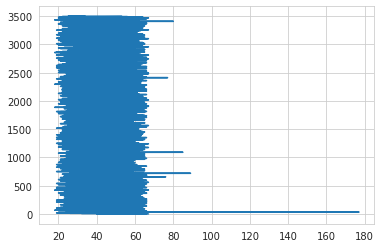

In [ ]:
plt.plot(final1.Age,final1.customer_id)
plt.show()

In [ ]:
final11=final1[final1['first_name']!='Jephthah']

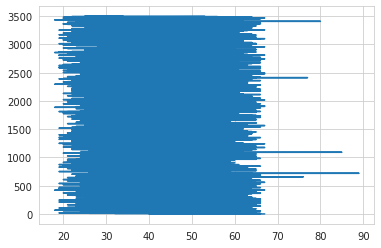

In [ ]:
plt.plot(final11.Age,final11.customer_id)
plt.show()

In [ ]:
final11['Age_categorized']=pd.cut(final11['Age'],bins=[5,20,30,40,50,60,70,80,90],labels=['teens','young','pre-middle aged','middle aged','post-middle aged','old (60-70)','70-80','80-90'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final11.head()

,customer_id,first_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,month,day,another,tenure1,Age_categorized
0,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,12,23,third,id3,old (60-70)
1,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,4,6,first,id3,old (60-70)
2,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,5,11,second,id3,old (60-70)
3,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,1,5,first,id3,old (60-70)
4,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,2,21,third,id3,old (60-70)


In [ ]:
pd.pivot_table(final11,index=['Age_categorized','brand'],values=[],aggfunc=[lambda x:x.count()])

<lambda>      
                                Age_categorized brand
Age_categorized  brand                               
teens            Giant Bicycles              65    65
                 Norco Bicycles              63    63
                 OHM Cycles                  59    59
                 Solex                       87    87
                 Trek Bicycles               52    52
                 WeareA2B                    67    67
young            Giant Bicycles             537   537
                 Norco Bicycles             492   492
                 OHM Cycles                 518   518
                 Solex                      737   737
                 Trek Bicycles              519   519
                 WeareA2B                   535   535
pre-middle aged  Giant Bicycles             603   603
                 Norco Bicycles             542   542
                 OHM Cycles                 562   562
                 Solex                      777   777
                 Trek Bicycles              538   538
                 WeareA2B                   619   619
middle aged      Giant Bicycles            1099  1099
                 Norco Bicycles            1000  1000
                 OHM Cycles                1044  1044
                 Solex                     1424  1424
                 Trek Bicycles             1008  1008
                 WeareA2B                  1106  1106
post-middle aged Giant Bicycles             558   558
                 Norco Bicycles             456   456
                 OHM Cycles                 504   504
                 Solex                      701   701
                 Trek Bicycles              510   510
                 WeareA2B                   582   582
old (60-70)      Giant Bicycles             377   377
                 Norco Bicycles             303   303
                 OHM Cycles                 298   298
                 Solex                      435   435
                 Trek Bicycles              296   296
                 WeareA2B                   331   331
70-80            Giant Bicycles               2     2
                 Norco Bicycles               3     3
                 OHM Cycles                   4     4
                 Solex                        3     3
                 Trek Bicycles                2     2
                 WeareA2B                     1     1
80-90            Giant Bicycles               2     2
                 Norco Bicycles               2     2
                 OHM Cycles                   3     3
                 Solex                        1     1
                 Trek Bicycles                6     6
                 WeareA2B                     1     1

The middle aged people are the highest buyers of cycles than any other age group.

In [ ]:
pd.pivot_table(final11,index=['Age_categorized','job_industry_category'],values=['customer_id','list_price'],aggfunc={'customer_id':lambda x:x.count(),'list_price':np.sum})
                                                                                                          

customer_id  list_price
Age_categorized  job_industry_category                         
teens            Argiculture                     15    19777.64
                 Entertainment                   13    17480.53
                 Financial Services              66    77550.28
                 Health                          68    81429.64
                 IT                              14    13596.71
                 Manufacturing                  147   165320.21
                 Property                        10    10916.29
                 Retail                          41    45641.91
                 Telecommunications              19    17058.58
young            Argiculture                     92    96035.62
                 Entertainment                   94   102399.71
                 Financial Services             832   941410.42
                 Health                         463   527057.36
                 IT                              99   103137.72
                 Manufacturing                 1159  1268051.20
                 Property                       216   234763.97
                 Retail                         325   361919.59
                 Telecommunications              58    58158.37
pre-middle aged  Argiculture                    107   119114.06
                 Entertainment                  136   150817.77
                 Financial Services             755   861085.85
                 Health                         492   528849.52
                 IT                             159   176820.70
                 Manufacturing                 1345  1498109.01
                 Property                       239   254424.01
                 Retail                         371   414049.86
                 Telecommunications              37    42204.13
middle aged      Argiculture                    246   256415.61
                 Entertainment                  238   269953.35
                 Financial Services            1157  1281414.50
                 Health                        1083  1190731.10
                 IT                             561   642364.51
                 Manufacturing                 2364  2566876.36
                 Property                       365   409503.26
                 Retail                         535   602970.12
                 Telecommunications             132   139060.50
post-middle aged Argiculture                     59    66827.21
                 Entertainment                  134   150861.51
                 Financial Services             613   664522.91
                 Health                         622   685928.41
                 IT                             119   139591.06
                 Manufacturing                 1218  1361617.54
                 Property                       236   266626.49
                 Retail                         241   278524.52
                 Telecommunications              69    78513.31
old (60-70)      Argiculture                     40    41661.21
                 Entertainment                   71    78250.18
                 Financial Services             350   375814.97
                 Health                         288   312458.58
                 IT                              89    95962.53
                 Manufacturing                  787   878906.77
                 Property                       189   212395.69
                 Retail                         190   212597.75
                 Telecommunications              36    36186.22
70-80            Manufacturing                   12    13972.18
                 Property                         3     2965.89
80-90            Retail                          15    17898.07

In [ ]:
pd.pivot_table(final11,index=['Age_categorized'],values=['customer_id'],aggfunc=[lambda x:x.count()])

,<lambda>
,customer_id
Age_categorized,
teens,393
young,3338
pre-middle aged,3641
middle aged,6681
post-middle aged,3311
old (60-70),2040
70-80,15
80-90,15


Sprocket central has most of middle aged customers (30-40)

In [ ]:
final11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19434 entries, 0 to 19441
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19434 non-null  int64         
 1   first_name                           19434 non-null  object        
 2   gender                               19434 non-null  object        
 3   past_3_years_bike_related_purchases  19434 non-null  int64         
 4   job_industry_category                19434 non-null  object        
 5   wealth_segment                       19434 non-null  object        
 6   deceased_indicator                   19434 non-null  object        
 7   owns_car                             19434 non-null  object        
 8   tenure                               19434 non-null  float64       
 9   Age                                  19434 non-null  float64       
 10  transactio

In [ ]:
final11.product_line.value_counts()

Standard    13914
Road         3890
Touring      1212
Mountain      418
Name: product_line, dtype: int64

In [ ]:
pd.pivot_table(final11,index=['Age_categorized','product_line'],values=['customer_id'],aggfunc=[lambda x:x.count()])

<lambda>
                              customer_id
Age_categorized  product_line            
teens            Mountain              12
                 Road                  77
                 Standard             283
                 Touring               21
young            Mountain              76
                 Road                 678
                 Standard            2390
                 Touring              194
pre-middle aged  Mountain              92
                 Road                 725
                 Standard            2578
                 Touring              246
middle aged      Mountain             138
                 Road                1360
                 Standard            4770
                 Touring              413
post-middle aged Mountain              59
                 Road                 643
                 Standard            2389
                 Touring              220
old (60-70)      Mountain              39
                 Road                 402
                 Standard            1481
                 Touring              118
70-80            Mountain               1
                 Road                   3
                 Standard              11
80-90            Mountain               1
                 Road                   2
                 Standard              12

The **middle aged** people are more inclined towards **standard** (**product_line**)

In [ ]:
pd.pivot_table(final11,index=['Age_categorized','product_size'],values=['customer_id'],aggfunc=[lambda x:x.count()])

<lambda>
                              customer_id
Age_categorized  product_size            
teens            large                 82
                 medium               253
                 small                 58
young            large                685
                 medium              2164
                 small                489
pre-middle aged  large                712
                 medium              2417
                 small                512
middle aged      large               1342
                 medium              4380
                 small                959
post-middle aged large                677
                 medium              2167
                 small                467
old (60-70)      large                397
                 medium              1360
                 small                283
70-80            large                  1
                 medium                11
                 small                  3
80-90            large                  3
                 medium                 8
                 small                  4

**Medium product_size** is more famous and has high sales 

In [ ]:
final1

,customer_id,first_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,month,day,another,tenure1
0,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,12,23,third,id3
1,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,4,6,first,id3
2,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,5,11,second,id3
3,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,1,5,first,id3
4,1,Laraine,Female,93,Health,Mass Customer,N,Yes,11.0,67.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,2,21,third,id3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19437,3500,Josy,Female,71,Entertainment,Affluent Customer,N,No,17.0,53.0,6309,69,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,1,9,first,id4
19438,3500,Josy,Female,71,Entertainment,Affluent Customer,N,No,17.0,53.0,8416,74,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,2,16,second,id4
19439,3500,Josy,Female,71,Entertainment,Affluent Customer,N,No,17.0,53.0,8562,33,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,8,8,first,id4
19440,3500,Josy,Female,71,Entertainment,Affluent Customer,N,No,17.0,53.0,14870,22,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,1,11,second,id4


In [ ]:
ca=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',skiprows=1)
ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
ca.postcode.value_counts()

2170    31
2155    30
2145    30
2153    29
2770    26
        ..
4552     1
4555     1
2485     1
3580     1
4421     1
Name: postcode, Length: 873, dtype: int64

In [ ]:
ca.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [ ]:
ca['state'].replace({'New South Wales':'NSW','Victoria':'VIC'},inplace=True)

In [ ]:
ca.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [ ]:
ca.country.value_counts()

Australia    3999
Name: country, dtype: int64

In [ ]:
ca.property_valuation.value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

In [ ]:
ca.drop('country',inplace=True,axis=1)

In [ ]:
ca.head()

,customer_id,address,postcode,state,property_valuation
0,1,060 Morning Avenue,2016,NSW,10
1,2,6 Meadow Vale Court,2153,NSW,10
2,4,0 Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,NSW,4
4,6,9 Oakridge Court,3216,VIC,9


In [ ]:
#ca.drop(['postcode','country'],inplace=True,axis=1)
#ca.info()

In [ ]:
final2=pd.merge(ca,final1,on='customer_id')

In [ ]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19415
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19416 non-null  int64         
 1   address                              19416 non-null  object        
 2   postcode                             19416 non-null  int64         
 3   state                                19416 non-null  object        
 4   property_valuation                   19416 non-null  int64         
 5   first_name                           19416 non-null  object        
 6   gender                               19416 non-null  object        
 7   past_3_years_bike_related_purchases  19416 non-null  int64         
 8   job_industry_category                19416 non-null  object        
 9   wealth_segment                       19416 non-null  object        
 10  deceased_i

In [ ]:
pd.pivot_table(final2,index=['state','brand'],values=['customer_id'],aggfunc=[lambda x:x.count()])

<lambda>
                     customer_id
state brand                     
NSW   Giant Bicycles        1692
      Norco Bicycles        1556
      OHM Cycles            1637
      Solex                 2200
      Trek Bicycles         1551
      WeareA2B              1728
QLD   Giant Bicycles         707
      Norco Bicycles         620
      OHM Cycles             635
      Solex                  883
      Trek Bicycles          600
      WeareA2B               699
VIC   Giant Bicycles         841
      Norco Bicycles         683
      OHM Cycles             717
      Solex                 1081
      Trek Bicycles          773
      WeareA2B               813

NSW has the highest sales for cycles

In [ ]:
pd.pivot_table(final2,index=['state','brand'],values=['list_price'],aggfunc=[np.mean,np.sum])

mean         sum
                       list_price  list_price
state brand                                  
NSW   Giant Bicycles  1225.988924  2074373.26
      Norco Bicycles   910.371118  1416537.46
      OHM Cycles       969.764918  1587505.17
      Solex           1054.005118  2318811.26
      Trek Bicycles   1190.757092  1846864.25
      WeareA2B        1254.007072  2166924.22
QLD   Giant Bicycles  1246.465332   881250.99
      Norco Bicycles   910.374274   564432.05
      OHM Cycles      1020.736598   648167.74
      Solex           1058.721178   934850.80
      Trek Bicycles   1180.255683   708153.41
      WeareA2B        1281.475794   895751.58
VIC   Giant Bicycles  1245.193603  1047207.82
      Norco Bicycles   921.242855   629208.87
      OHM Cycles       971.005397   696210.87
      Solex           1055.664931  1141173.79
      Trek Bicycles   1178.741643   911167.29
      WeareA2B        1268.890394  1031607.89

In [ ]:
pd.pivot_table(final2,index=['state'],values=['list_price'],aggfunc=[np.sum,np.mean])

,sum,mean
,list_price,list_price
state,,
NSW,11411015.62,1101.024278
QLD,4632606.57,1117.906991
VIC,5456576.53,1111.771909



1.  Queensland has the highest mean for list price

2.  NSW has generated highest revenue of 11 million dollars



In [ ]:
final2.property_valuation.value_counts()

8     3250
9     3174
10    2761
7     2304
11    1368
6     1142
5     1108
4     1040
12     944
3      876
1      783
2      666
Name: property_valuation, dtype: int64

In [ ]:
pd.pivot_table(final2,index=['property_valuation'],values=['list_price'],aggfunc=[np.sum,lambda x:x.count(),np.mean])

,sum,<lambda>,mean
,list_price,list_price,list_price
property_valuation,,,
1,851700.20,783.0,1087.739719
2,780925.77,666.0,1172.561216
3,959915.79,876.0,1095.794281
4,1196220.95,1040.0,1150.212452
5,1215416.04,1108.0,1096.945884
6,1256769.30,1142.0,1100.498511
7,2549328.58,2304.0,1106.479418
8,3589286.22,3250.0,1104.395760




1.   There are most of property valuation 8 customers shop at sprocket central.
2.   Property valuation 2 customers buy items worth high money compared to others.
3.  High concentration towards property valuation 8 and 9 customers.



In [ ]:
final2.postcode.value_counts()

2153    158
2770    144
2170    138
2155    131
3977    123
       ... 
2850      1
4159      1
3060      1
3818      1
3616      1
Name: postcode, Length: 835, dtype: int64

In [ ]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19415
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19416 non-null  int64         
 1   address                              19416 non-null  object        
 2   postcode                             19416 non-null  int64         
 3   state                                19416 non-null  object        
 4   property_valuation                   19416 non-null  int64         
 5   first_name                           19416 non-null  object        
 6   gender                               19416 non-null  object        
 7   past_3_years_bike_related_purchases  19416 non-null  int64         
 8   job_industry_category                19416 non-null  object        
 9   wealth_segment                       19416 non-null  object        
 10  deceased_i

In [ ]:
final2.drop('first_name',inplace=True,axis=1)

In [ ]:
final2.product_size.value_counts()

medium    12747
large      3894
small      2775
Name: product_size, dtype: int64

In [ ]:
final2.transaction_date.value_counts()[:5]

2017-02-14    81
2017-08-18    81
2017-10-15    73
2017-01-31    72
2017-12-19    70
Name: transaction_date, dtype: int64

In [ ]:
final2[['gender','Age']][final2['transaction_date']=='2017-02-14']

,gender,Age
484,Male,53.0
660,Male,63.0
1174,Female,19.0
1602,Male,35.0
1796,Female,43.0
...,...,...
18146,Female,39.0
18474,Male,45.0
19195,Female,64.0
19206,Male,21.0


Female bought more cycles than men on valentines day

In [ ]:
#final2.drop(['deceased_indicator','transaction_id','product_id','transaction_date','product_first_sold_date','month','day','another','tenure1'],axis=1,inplace=True)

In [ ]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19415
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19416 non-null  int64         
 1   address                              19416 non-null  object        
 2   postcode                             19416 non-null  int64         
 3   state                                19416 non-null  object        
 4   property_valuation                   19416 non-null  int64         
 5   gender                               19416 non-null  object        
 6   past_3_years_bike_related_purchases  19416 non-null  int64         
 7   job_industry_category                19416 non-null  object        
 8   wealth_segment                       19416 non-null  object        
 9   deceased_indicator                   19416 non-null  object        
 10  owns_car  

In [ ]:
state_dum=pd.get_dummies(final2['state'])
#state_dum

In [ ]:
gender_dum=pd.get_dummies(final2['gender'])

In [ ]:
job_cat_dum=pd.get_dummies(final2['job_industry_category'])

In [ ]:
wealth_cat_dum=pd.get_dummies(final2['wealth_segment'])

In [ ]:
owns_car_dum=pd.get_dummies(final2['owns_car'])

In [ ]:
online_order_dum=pd.get_dummies(final2['online_order'])
order_status_dum=pd.get_dummies(final2['order_status'])
brand_dum=pd.get_dummies(final2['brand'])


In [ ]:
cust=final2[['customer_id','list_price']]
final_cost=cust.groupby(['customer_id']).sum()

In [ ]:
final_cost

,list_price
customer_id,
1,9084.45
2,4149.07
4,1047.72
5,5903.20
6,5931.69
...,...
3496,4725.38
3497,3744.07
3498,5177.06


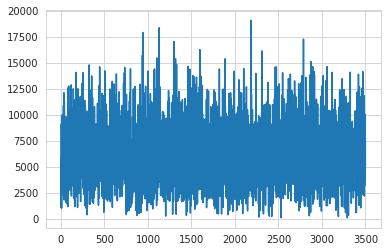

In [ ]:
plt.plot(final_cost)

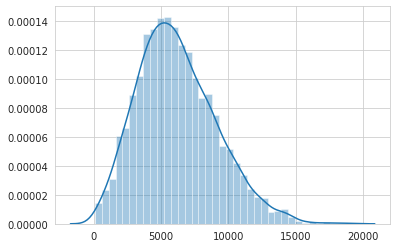

In [ ]:
sns.distplot(final_cost)

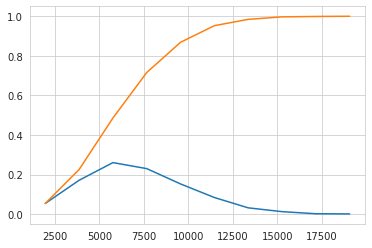

In [ ]:
counts,binedges=np.histogram(final_cost['list_price'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)

plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)

plt.show()

---------------------------------------------------------------------------

In [ ]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19415
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19416 non-null  int64         
 1   address                              19416 non-null  object        
 2   postcode                             19416 non-null  int64         
 3   state                                19416 non-null  object        
 4   property_valuation                   19416 non-null  int64         
 5   gender                               19416 non-null  object        
 6   past_3_years_bike_related_purchases  19416 non-null  int64         
 7   job_industry_category                19416 non-null  object        
 8   wealth_segment                       19416 non-null  object        
 9   deceased_indicator                   19416 non-null  object        
 10  owns_car  

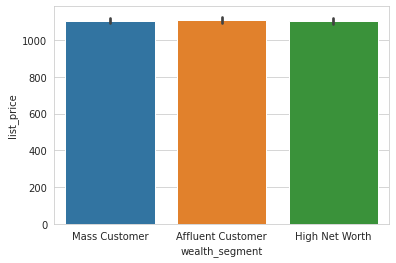

In [ ]:
sns.barplot(final2['wealth_segment'],final2['list_price'])

In [ ]:
#sns.barplot(final2['wealth_segment'])#,final2['wealth_segement'].apply(lambda x:x.count()))